# Part A: Data
# Introduction
This notebook contains all code that has been used to prepare the EStreams and other data for the analysis performed in the "How landscape data quality affects our perception of dominant processes in large-sample hydrology studies?" paper by do Nascimento et al. (in review). To be able to run this notebook, please ensure that you have downloaded the acompanying data of the paper. All links can be found in the data section of the paper.

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore', category=Warning)


# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."

# Set the directory:
os.chdir(PATH)

In [3]:
path_estreams = r'C:\Users\nascimth\Documents\data\EStreams'

# Import data

### - Network information

In [4]:
network_estreams = pd.read_csv(path_estreams+'/streamflow_gauges/estreams_gauging_stations.csv', encoding='utf-8')
network_estreams.set_index("basin_id", inplace = True)

# Convert 'date_column' and 'time_column' to datetime
network_estreams['start_date'] = pd.to_datetime(network_estreams['start_date'])
network_estreams['end_date'] = pd.to_datetime(network_estreams['end_date'])

network_estreams

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,420,...,9497,0.0,0.0,9497.0,0.0,B,['CH000197'],1,16,"['AT000001', 'CH000010', 'CH000046', 'CH000048..."
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,23103,0.0,0.0,23103.0,0.0,B,['CH000221'],1,1,['AT000002']
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,13513,0.0,0.0,13513.0,0.0,B,['CH000215'],1,2,"['AT000002', 'AT000003', 'CH000221']"
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,1014,...,8765,0.0,0.0,8765.0,0.0,B,['CH000227'],1,1,['AT000004']
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,10957,0.0,0.0,10957.0,0.0,B,['CH000214'],1,3,"['AT000005', 'CH000214']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,NaN,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1988,1,['UAGR0017']
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,16,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1989,1,['UAGR0018']
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,307,...,3652,0.0,0.0,3652.0,0.0,B,NaN,1990,1,['UAGR0019']


In [28]:
estreams_signatures = pd.read_csv(path_estreams+'/hydroclimatic_signatures/estreams_hydrometeo_signatures.csv', encoding='utf-8')
estreams_signatures.set_index("basin_id", inplace = True)

# Mapping dictionary for reclassification
time_mapping = {
    'Fall': 1, 
    'Winter': 2,  
    'Spring': 3,  
    'Summer': 4, 
}

# Reclassify time classes using the mapping dictionary
estreams_signatures['hp_time'] = estreams_signatures['hp_time'].map(time_mapping)
estreams_signatures['lp_time'] = estreams_signatures['lp_time'].map(time_mapping)

# Subset the signatures to be used (only variables, not dates and number of measurments):
estreams_signatures = estreams_signatures.iloc[:, 0:-6]
estreams_signatures

,q_mean,q_runoff_ratio,q_elas_Sankarasubramanian,slope_sawicz,baseflow_index,hfd_mean,hfd_std,q_5,q_95,hq_freq,...,pet_mean,aridity,p_seasonality,frac_snow,hp_freq,hp_dur,hp_time,lp_freq,lp_dur,lp_time
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,2.824,0.727,1.266,1.505,0.760,237.600,12.858,1.029,6.607,0.077,...,1.499,0.395,0.309,0.326,13.239,1.172,4.0,198.993,3.561,1.0
AT000002,3.898,1.004,1.223,2.467,0.720,247.952,10.932,0.980,10.727,0.964,...,1.526,0.390,0.331,0.332,15.389,1.215,4.0,204.041,3.576,1.0
AT000003,0.915,0.247,1.802,0.979,0.687,233.361,27.141,0.404,2.819,6.136,...,1.516,0.411,0.346,0.337,15.212,1.203,4.0,202.001,3.592,1.0
AT000004,5.079,1.319,0.324,2.188,0.747,242.783,10.736,1.499,13.295,0.042,...,1.445,0.384,0.338,0.361,15.956,1.217,4.0,205.803,3.598,1.0
AT000005,3.319,0.806,0.820,1.967,0.756,239.207,14.642,1.064,7.692,0.233,...,1.814,0.448,0.328,0.200,15.266,1.186,4.0,201.796,3.547,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,0.150,0.088,2.387,NaN,0.354,189.111,72.114,0.000,0.797,81.511,...,2.196,1.354,-0.276,0.183,21.817,1.264,2.0,270.637,5.789,4.0
UAGR0018,0.475,0.266,2.041,NaN,0.207,160.444,42.925,0.000,3.631,60.508,...,2.148,1.270,-0.290,0.198,21.849,1.263,2.0,268.322,5.700,4.0
UAGR0019,0.312,0.194,2.893,NaN,0.354,184.667,59.422,0.000,1.412,127.517,...,2.216,1.494,-0.157,0.172,22.917,1.271,2.0,273.598,5.876,4.0


In [29]:
estreams_meteodensity = pd.read_csv(path_estreams+'//attributes/static_attributes/estreams_meteorology_density.csv', encoding='utf-8')
estreams_meteodensity.set_index("basin_id", inplace = True)

# Here we select only these variables as representative:
estreams_meteodensity = estreams_meteodensity[["stations_num_p_mean"]]

estreams_meteodensity.head()

,stations_num_p_mean
basin_id,
AT000001,22.0
AT000002,14.0
AT000003,18.0
AT000004,7.0
AT000005,10.0


In [96]:
estreams_topography = pd.read_csv(path_estreams+'//attributes/static_attributes/estreams_topography_attributes.csv', encoding='utf-8')
estreams_topography.set_index("basin_id", inplace = True)
estreams_topography

,ele_mt_max,ele_mt_mean,ele_mt_min,slp_dg_mean,flat_area_fra,steep_area_fra,elon_ratio,strm_dens
basin_id,,,,,,,,
AT000001,3555.408,1874.076,420.622,24.122,3.395,78.590,0.612,0.151
AT000002,2803.984,1773.178,674.209,26.095,0.463,87.662,0.539,0.151
AT000003,3293.054,1843.003,583.510,25.735,1.497,82.952,0.577,0.141
AT000004,2878.033,1890.429,1022.324,27.324,0.351,88.023,0.587,0.095
AT000005,2938.964,1772.902,567.275,28.647,1.719,83.629,0.612,0.134
...,...,...,...,...,...,...,...,...
UAGR0017,1537.278,564.291,161.399,11.810,4.283,24.393,0.634,0.129
UAGR0018,1511.835,749.565,16.793,19.438,2.114,61.735,0.621,0.024
UAGR0019,1449.416,653.127,306.877,9.655,17.055,20.545,0.739,0.112


In [97]:
estreams_hydrology = pd.read_csv(path_estreams+'//attributes/static_attributes/estreams_hydrology_attributes.csv', encoding='utf-8')
estreams_hydrology.set_index("basin_id", inplace = True)

# Here we select only these variables as representative
estreams_hydrology = estreams_hydrology[["dam_num", "res_num", "lakes_num", "lakes_tot_area", "lakes_tot_vol"]]
estreams_hydrology

,dam_num,res_num,lakes_num,lakes_tot_area,lakes_tot_vol
basin_id,,,,,
AT000001,23.0,10.0,10.0,6.62,542.33
AT000002,0.0,0.0,0.0,0.00,0.00
AT000003,4.0,4.0,3.0,1.46,12.91
AT000004,0.0,0.0,0.0,0.00,0.00
AT000005,1.0,1.0,1.0,0.89,8.27
...,...,...,...,...,...
UAGR0017,0.0,0.0,1.0,1.43,16.43
UAGR0018,0.0,0.0,0.0,0.00,0.00
UAGR0019,0.0,0.0,1.0,0.31,1.54


In [98]:
estreams_soil = pd.read_csv(path_estreams+'/attributes/static_attributes/estreams_soil_attributes.csv', encoding='utf-8')
estreams_soil.set_index("basin_id", inplace = True)

# Here we select only these variables as representative
estreams_soil = estreams_soil[['root_dep_mean', 'root_dep_max', 'root_dep_min',
       'soil_tawc_mean', 'soil_fra_sand_mean', 'soil_fra_silt_mean',
       'soil_fra_clay_mean', 'soil_fra_grav_mean', 'soil_bd_mean','soil_oc_mean']]

estreams_soil

,root_dep_mean,root_dep_max,root_dep_min,soil_tawc_mean,soil_fra_sand_mean,soil_fra_silt_mean,soil_fra_clay_mean,soil_fra_grav_mean,soil_bd_mean,soil_oc_mean
basin_id,,,,,,,,,,
AT000001,81.571,130.0,0.0,28.738,58.196,16.337,7.973,9.062,1.303,1.218
AT000002,58.600,70.0,30.0,46.474,54.920,29.650,15.430,8.140,1.502,1.820
AT000003,51.660,130.0,0.0,45.044,49.262,30.836,16.883,10.294,1.425,1.714
AT000004,49.412,70.0,30.0,49.256,39.956,40.088,19.956,13.044,1.409,1.771
AT000005,31.781,100.0,0.0,44.098,39.795,38.151,20.685,17.658,1.384,1.836
...,...,...,...,...,...,...,...,...,...,...
UAGR0017,128.620,130.0,40.0,51.371,23.184,29.245,47.571,9.939,1.246,1.198
UAGR0018,73.061,130.0,40.0,64.165,30.592,39.122,30.286,7.469,1.066,2.340
UAGR0019,130.000,130.0,130.0,51.029,23.115,29.123,47.761,10.049,1.251,1.178


In [99]:
estreams_landcover = pd.read_csv(path_estreams+'//attributes/temporal_attributes/estreams_landcover_attributes.csv', encoding='utf-8')
estreams_landcover.set_index("basin_id", inplace = True)
estreams_landcover

# We have more than 20 classes, so it is better if we aggregate the classes in more representative ones:
# * 1. Urban, 2. Non irrigated aggriculture, 3. Irrigated aggriculture, 4. grassland and 5. forests

def aggregate_columns(df, years):
    # Initialize a dictionary to store aggregated columns
    aggregated_columns = {}

    # Iterate through each year
    for year in years:
        # Iterate through each column in the DataFrame
        for column in df.columns:
            # Check if the column name contains the specified year and the number is between 300 and 315 for forest
            if f'_{year}_' in column and 300 <= int(column.split('_')[-1]) < 315:
                prefix = '_'.join(column.split('_')[:-1]) + "_forest"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]
            # Check if the column name contains the specified year and the number is between 315 and 400 for grass
            elif f'_{year}_' in column and 315 <= int(column.split('_')[-1]) < 400:
                prefix = '_'.join(column.split('_')[:-1]) + "_grass"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]
            # Check if the column name contains the specified year and the number is between 200 and 300 for agriculture
            elif f'_{year}_' in column and 212 <= int(column.split('_')[-1]) < 300:
                prefix = '_'.join(column.split('_')[:-1]) + "_Agric"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]
        
            # Check if the column name contains the specified year and the number is between 200 and 300 for agriculture
            elif f'_{year}_' in column and 200 <= int(column.split('_')[-1]) < 212:
                prefix = '_'.join(column.split('_')[:-1]) + "_NonIrriAgri"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]

             # Check if the column name contains the specified year and the number is between 200 and 300 for agriculture
            elif f'_{year}_' in column and 111 <= int(column.split('_')[-1]) <= 124:
                prefix = '_'.join(column.split('_')[:-1]) + "_urban"
                if prefix in aggregated_columns:
                    aggregated_columns[prefix].append(column)
                else:
                    aggregated_columns[prefix] = [column]                   
    # Iterate through the aggregated_columns dictionary and create new aggregated columns
    for prefix, columns in aggregated_columns.items():
        # Aggregate the columns by summing them along the columns axis
        df[prefix] = df[columns].sum(axis=1)
        # Drop the original columns
        df.drop(columns, axis=1, inplace=True)

# List of years to iterate over
years = [1990, 2000, 2006, 2012, 2018]

# Call the function to aggregate columns for each year
aggregate_columns(estreams_landcover, years)


# Filter only the columns already resampled:
estreams_landcover = estreams_landcover.iloc[:, -25:]

# Subset only one year to avoid co-correlation
estreams_landcover = estreams_landcover[["lulc_2006_urban", "lulc_2006_NonIrriAgri", "lulc_2006_Agric", "lulc_2006_forest", 
                                         "lulc_2006_grass"]]
estreams_landcover["lulc_2006_agriculture"] = estreams_landcover.lulc_2006_NonIrriAgri + estreams_landcover.lulc_2006_Agric

estreams_landcover.head()

,lulc_2006_urban,lulc_2006_NonIrriAgri,lulc_2006_Agric,lulc_2006_forest,lulc_2006_grass,lulc_2006_agriculture
basin_id,,,,,,
AT000001,0.020,0.019,0.108,0.268,0.581,0.127
AT000002,0.029,0.000,0.051,0.331,0.577,0.051
AT000003,0.031,0.000,0.040,0.269,0.647,0.040
AT000004,0.023,0.000,0.031,0.177,0.739,0.031
AT000005,0.017,0.000,0.023,0.283,0.624,0.023


In [100]:
estreams_vegetation= pd.read_csv(path_estreams+"//attributes/static_attributes/estreams_vegetation_attributes.csv", encoding='utf-8')
estreams_vegetation.set_index("basin_id", inplace = True)

# Here we select only these two variables as representative
estreams_vegetation = estreams_vegetation[["lai_mean", "ndvi_mean"]]
estreams_vegetation

,lai_mean,ndvi_mean
basin_id,,
AT000001,0.092,0.329
AT000002,0.089,0.342
AT000003,0.087,0.313
AT000004,0.073,0.276
AT000005,0.086,0.311
...,...,...
UAGR0017,0.195,0.599
UAGR0018,0.152,0.576
UAGR0019,0.145,0.535


In [101]:
estreams_snowcover = pd.read_csv(path_estreams+"//attributes/static_attributes/estreams_snowcover_attributes.csv", encoding='utf-8')
estreams_snowcover.set_index("basin_id", inplace = True)

# Here we select only these two variables as representative
estreams_snowcover = estreams_snowcover[["sno_cov_mean"]]
estreams_snowcover

,sno_cov_mean
basin_id,
AT000001,33.844
AT000002,36.284
AT000003,36.927
AT000004,40.210
AT000005,34.486
...,...
UAGR0017,3.805
UAGR0018,6.159
UAGR0019,4.928


In [8]:
performances = pd.read_csv("data\performances.txt", sep="\t")
performances.set_index("id", inplace=True)
performances

,p_camels_tq/evap_camels,p_estreams_tq/evap_camels,p_t_camels_q/evap_camels,p_t_estreams_q/evap_camels,pt_q_camels/evap_camels,pt_q_estreams/evap_camels,ptq_camels/evap_camels,ptq_estreams/evap_camels,p_camels_tq/evap_estreams,p_estreams_tq/evap_estreams,p_t_camels_q/evap_estreams,p_t_estreams_q/evap_estreams,pt_q_camels/evap_estreams,pt_q_estreams/evap_estreams,ptq_camels/evap_estreams,ptq_estreams/evap_estreams,color,cam_min_estr
id,,,,,,,,,,,,,,,,,,
AT000002,0.912559,0.878612,0.880653,0.913105,0.900589,0.898155,0.896840,0.899162,0.913757,0.884673,0.886666,0.913440,0.903629,0.893866,0.898206,0.900268,pink,-0.003428
AT000003,-0.847771,-0.203314,-0.181490,-0.834960,-0.177242,-0.772337,-0.814603,-0.191492,-0.873919,-0.247793,-0.251435,-0.882307,-0.208316,-0.847132,-0.831916,-0.202786,pink,-0.611817
AT000005,0.877461,0.876717,0.873821,0.880424,0.887318,0.871989,0.872962,0.888593,0.880978,0.874935,0.875113,0.881777,0.884695,0.873326,0.874370,0.885210,pink,-0.012248
AT000006,0.856988,0.763575,0.760387,0.858968,0.772780,0.839222,0.841662,0.770377,0.857782,0.761512,0.758773,0.859790,0.769599,0.842745,0.842049,0.768985,pink,0.072677
AT000007,0.604909,0.824089,0.826503,0.603074,0.846021,0.572963,0.571124,0.840672,0.602373,0.831248,0.830191,0.606975,0.837836,0.576859,0.575120,0.850400,pink,-0.279275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000252,0.619505,0.948688,0.550172,0.958501,0.952875,0.614139,0.957227,0.554647,0.669618,0.958916,0.603327,0.960808,0.959033,0.664761,0.961166,0.603316,black,0.353911
SE000277,0.847042,0.815408,0.816995,0.845324,0.814350,0.845970,0.846135,0.816816,0.866532,0.845474,0.853202,0.866861,0.852023,0.868283,0.866692,0.855229,black,-0.009094
SE000283,0.890972,0.815181,0.800837,0.898393,0.806755,0.891417,0.897218,0.795021,0.917508,0.857763,0.850256,0.917493,0.861439,0.920629,0.920063,0.846725,black,0.050493


In [9]:
performances.columns

Index(['p_camels_tq/evap_camels', 'p_estreams_tq/evap_camels',
       'p_t_camels_q/evap_camels', 'p_t_estreams_q/evap_camels',
       'pt_q_camels/evap_camels', 'pt_q_estreams/evap_camels',
       'ptq_camels/evap_camels', 'ptq_estreams/evap_camels',
       'p_camels_tq/evap_estreams', 'p_estreams_tq/evap_estreams',
       'p_t_camels_q/evap_estreams', 'p_t_estreams_q/evap_estreams',
       'pt_q_camels/evap_estreams', 'pt_q_estreams/evap_estreams',
       'ptq_camels/evap_estreams', 'ptq_estreams/evap_estreams', 'color',
       'cam_min_estr'],
      dtype='object')

In [113]:


# Concatenate horizontally
network_basins = pd.concat([network_estreams, performances, estreams_signatures, estreams_topography,
                                           estreams_soil, estreams_vegetation, estreams_landcover,
                                           estreams_hydrology, estreams_snowcover, estreams_meteodensity], axis=1)

network_basins = network_basins.loc[performances.index]

network_basins

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,lulc_2006_forest,lulc_2006_grass,lulc_2006_agriculture,dam_num,res_num,lakes_num,lakes_tot_area,lakes_tot_vol,sno_cov_mean,stations_num_p_mean
id,,,,,,,,,,,,,,,,,,,,,
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,0.331,0.577,0.051,0.0,0.0,0.0,0.00,0.00,36.284,14.0
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,0.269,0.647,0.040,4.0,4.0,3.0,1.46,12.91,36.927,18.0
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,0.283,0.624,0.023,1.0,1.0,1.0,0.89,8.27,34.486,10.0
AT000006,200105,Garsella,AT,AT_EHYD,Lutz,9.875898,47.226658,9.875898,47.226658,730,...,0.278,0.661,0.058,0.0,0.0,0.0,0.00,0.00,33.031,15.0
AT000007,231688,Beschling,AT,AT_EHYD,Ill,9.678850,47.200301,9.678850,47.200301,485,...,0.331,0.559,0.058,7.0,6.0,5.0,2.67,23.90,32.887,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000252,257,MUNKEDAL 2,SE,SE_SMHI,ÖREKILSÄLVEN,11.683300,58.463600,11.683300,58.463600,NaN,...,0.674,0.069,0.178,0.0,0.0,36.0,19.61,216.56,11.133,10.0
SE000277,364,HILLARED,SE,SE_SMHI,ÄTRAN,13.141300,57.607300,13.141300,57.607300,NaN,...,0.641,0.034,0.234,0.0,0.0,29.0,50.78,541.40,13.610,12.0
SE000283,654,ERSBO,SE,SE_SMHI,VÄSTERDALÄLVEN,13.011000,61.307600,13.011000,61.307600,NaN,...,0.500,0.433,0.005,0.0,0.0,15.0,3.35,14.59,35.366,10.0


In [114]:
world = gpd.read_file(r"C:\Users\nascimth\Documents\data\gis\world.shp")


In [115]:
network_basins["diff"] = network_basins['ptq_camels/evap_camels'] - network_basins['pt_q_camels/evap_estreams']

network_basins

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,lulc_2006_grass,lulc_2006_agriculture,dam_num,res_num,lakes_num,lakes_tot_area,lakes_tot_vol,sno_cov_mean,stations_num_p_mean,diff
id,,,,,,,,,,,,,,,,,,,,,
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,673,...,0.577,0.051,0.0,0.0,0.0,0.00,0.00,36.284,14.0,-0.006789
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,579,...,0.647,0.040,4.0,4.0,3.0,1.46,12.91,36.927,18.0,-0.606287
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,564,...,0.624,0.023,1.0,1.0,1.0,0.89,8.27,34.486,10.0,-0.011733
AT000006,200105,Garsella,AT,AT_EHYD,Lutz,9.875898,47.226658,9.875898,47.226658,730,...,0.661,0.058,0.0,0.0,0.0,0.00,0.00,33.031,15.0,0.072063
AT000007,231688,Beschling,AT,AT_EHYD,Ill,9.678850,47.200301,9.678850,47.200301,485,...,0.559,0.058,7.0,6.0,5.0,2.67,23.90,32.887,40.0,-0.266711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000252,257,MUNKEDAL 2,SE,SE_SMHI,ÖREKILSÄLVEN,11.683300,58.463600,11.683300,58.463600,NaN,...,0.069,0.178,0.0,0.0,36.0,19.61,216.56,11.133,10.0,-0.001806
SE000277,364,HILLARED,SE,SE_SMHI,ÄTRAN,13.141300,57.607300,13.141300,57.607300,NaN,...,0.034,0.234,0.0,0.0,29.0,50.78,541.40,13.610,12.0,-0.005889
SE000283,654,ERSBO,SE,SE_SMHI,VÄSTERDALÄLVEN,13.011000,61.307600,13.011000,61.307600,NaN,...,0.433,0.005,0.0,0.0,15.0,3.35,14.59,35.366,10.0,0.035779


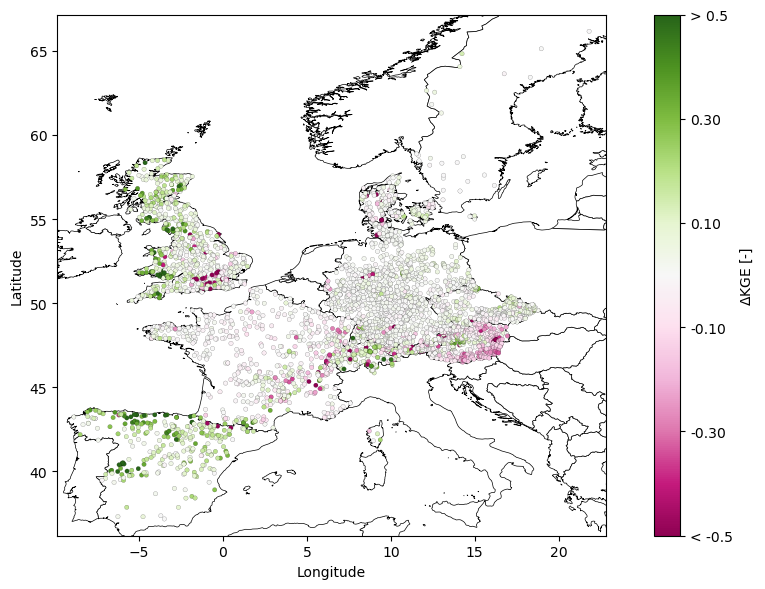

In [164]:
import matplotlib.pyplot as plt
import numpy as np

df = network_basins.copy()

# Clip values
df["diff"] = df["diff"].clip(lower=-0.5, upper=0.5)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot basemap
world.plot(ax=ax, color='white', edgecolor='k', linewidth=0.5)

# Create scatter plot
sc = ax.scatter(
    df["lon_snap"], df["lat_snap"],
    c=df["diff"], cmap="PiYG", s=10, edgecolor="k", linewidths=0.1, vmin=-0.5, vmax=0.5
)

# Custom ticks and labels
ticks = np.linspace(-0.5, 0.5, num=6)  # Adjust number of ticks if needed
tick_labels = [f"< -0.5"] + [f"{t:.2f}" for t in ticks[1:-1]] + [f"> 0.5"]

# Create colorbar without arrows
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label(r"$\Delta$KGE [-]")
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)

# Axis labels and limits
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_xlim(df["lon_snap"].min() - 1, df["lon_snap"].max() + 1)
ax.set_ylim(df["lat_snap"].min() - 1, df["lat_snap"].max() + 1)

plt.grid(False)
plt.tight_layout()
plt.show()

In [126]:
network_basins["area"] = network_basins["area_estreams"]

In [127]:

network_basins.iloc[:, 47:].corr()["diff"][40:]

soil_fra_grav_mean       0.011615
soil_bd_mean            -0.112623
soil_oc_mean             0.108795
lai_mean                -0.015511
ndvi_mean               -0.035075
lulc_2006_urban         -0.064034
lulc_2006_NonIrriAgri   -0.104047
lulc_2006_Agric         -0.029273
lulc_2006_forest        -0.007260
lulc_2006_grass          0.171589
lulc_2006_agriculture   -0.113978
dam_num                  0.023714
res_num                  0.021956
lakes_num                0.003055
lakes_tot_area           0.020453
lakes_tot_vol            0.025256
sno_cov_mean             0.006475
stations_num_p_mean     -0.054592
diff                     1.000000
area                     0.009982
Name: diff, dtype: float64

In [112]:
network_basins.iloc[:, 52:]

,lp_dur,lp_time,ele_mt_max,ele_mt_mean,ele_mt_min,slp_dg_mean,flat_area_fra,steep_area_fra,elon_ratio,strm_dens,...,p_estreams_tq/evap_estreams,p_t_camels_q/evap_estreams,p_t_estreams_q/evap_estreams,pt_q_camels/evap_estreams,pt_q_estreams/evap_estreams,ptq_camels/evap_estreams,ptq_estreams/evap_estreams,color,cam_min_estr,diff
id,,,,,,,,,,,,,,,,,,,,,
AT000002,3.576,1.0,2803.984,1773.178,674.209,26.095,0.463,87.662,0.539,0.151,...,0.884673,0.886666,0.913440,0.903629,0.893866,0.898206,0.900268,pink,-0.003428,-0.006789
AT000003,3.592,1.0,3293.054,1843.003,583.510,25.735,1.497,82.952,0.577,0.141,...,-0.247793,-0.251435,-0.882307,-0.208316,-0.847132,-0.831916,-0.202786,pink,-0.611817,-0.606287
AT000005,3.547,1.0,2938.964,1772.902,567.275,28.647,1.719,83.629,0.612,0.134,...,0.874935,0.875113,0.881777,0.884695,0.873326,0.874370,0.885210,pink,-0.012248,-0.011733
AT000006,3.500,1.0,2671.370,1605.505,736.405,28.430,0.431,89.636,0.636,0.108,...,0.761512,0.758773,0.859790,0.769599,0.842745,0.842049,0.768985,pink,0.072677,0.072063
AT000007,3.545,1.0,3293.054,1659.784,481.164,25.714,3.396,81.664,0.601,0.153,...,0.831248,0.830191,0.606975,0.837836,0.576859,0.575120,0.850400,pink,-0.279275,-0.266711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE000252,4.124,3.0,272.078,140.906,1.924,3.631,53.475,0.906,0.458,0.191,...,0.958916,0.603327,0.960808,0.959033,0.664761,0.961166,0.603316,black,0.353911,-0.001806
SE000277,3.954,3.0,362.865,234.794,152.304,2.660,66.926,0.254,0.444,0.182,...,0.845474,0.853202,0.866861,0.852023,0.868283,0.866692,0.855229,black,-0.009094,-0.005889
SE000283,4.221,3.0,1098.176,733.686,394.480,5.983,31.804,5.895,0.516,0.167,...,0.857763,0.850256,0.917493,0.861439,0.920629,0.920063,0.846725,black,0.050493,0.035779


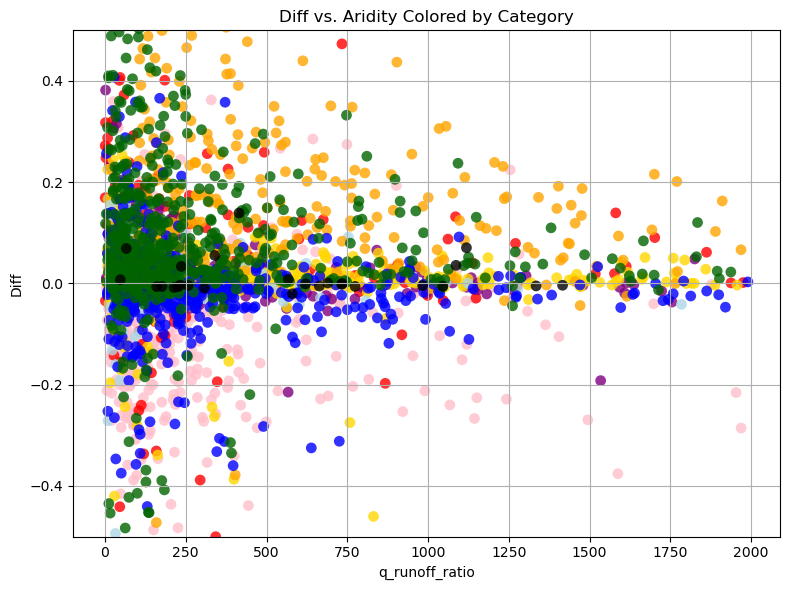

In [130]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has 'aridity', 'diff', and 'color' columns
plt.figure(figsize=(8, 6))

# Scatter plot using the 'color' column for coloring
plt.scatter(network_basins["area"], network_basins["diff"], c=network_basins["color"], edgecolor="none", s=60, alpha=0.8)

plt.xlabel("q_runoff_ratio")
plt.ylabel("Diff")
plt.title("Diff vs. Aridity Colored by Category")
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.tight_layout()

plt.show()


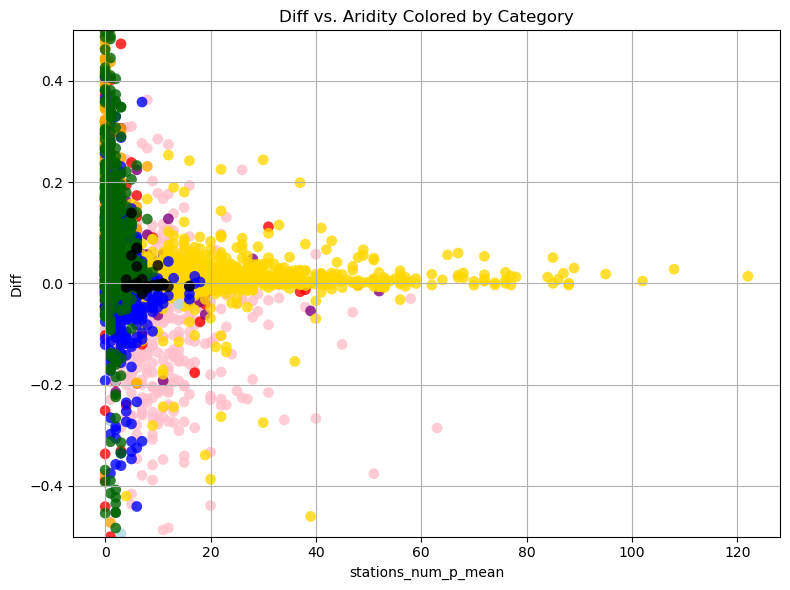

In [136]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has 'aridity', 'diff', and 'color' columns
plt.figure(figsize=(8, 6))

# Scatter plot using the 'color' column for coloring
plt.scatter(network_basins["stations_num_p_mean"], network_basins["diff"], c=network_basins["color"], edgecolor="none", s=60, alpha=0.8)

plt.xlabel("stations_num_p_mean")
plt.ylabel("Diff")
plt.title("Diff vs. Aridity Colored by Category")
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.tight_layout()

plt.show()


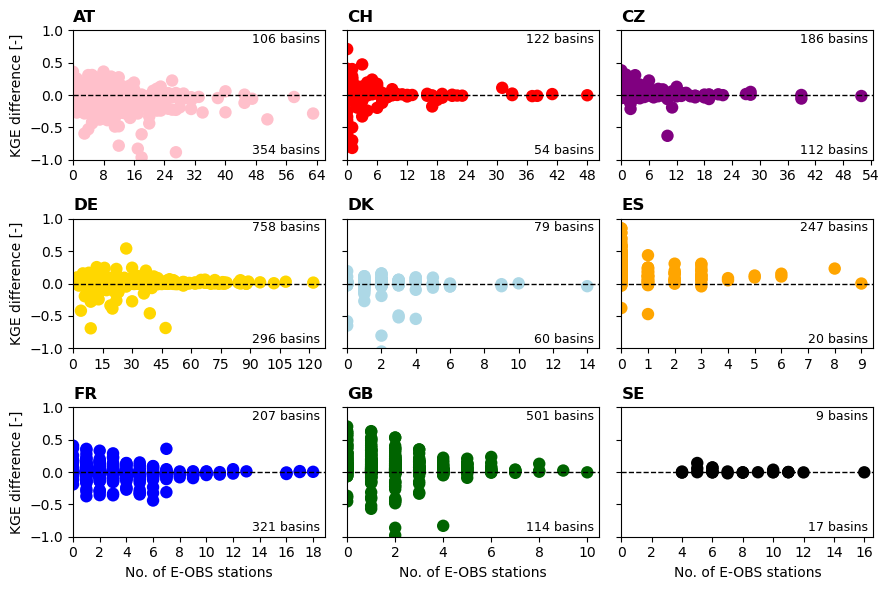

In [140]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Get unique color groups
groups = network_basins['color'].unique()
n_groups = len(groups)

# Map each color to its corresponding gauge_country (assuming it's consistent per color)
color_to_country = network_basins.drop_duplicates('color').set_index('color')['gauge_country'].to_dict()

# Set up subplot grid
n_cols = 3
n_rows = (n_groups + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9,6), sharex=False, sharey=True)
axes = axes.flatten()

for i, color in enumerate(groups):
    group_df = network_basins[network_basins['color'] == color]
    country = color_to_country[color]

    axes[i].scatter(
        group_df["stations_num_p_mean"], 
        group_df["diff"], 
        color=color, 
        s=80, 
        alpha=1, 
        edgecolor='none'
    )
    axes[i].set_title(f"{country}", fontsize=12, fontweight="bold", loc="left")
    # Only set x-label for subplots in the bottom row
    if i // n_cols == n_rows - 1:
        axes[i].set_xlabel("No. of E-OBS stations")
    
    if i % n_cols == 0:
        axes[i].set_ylabel("KGE difference [-]")
    
    axes[i].set_xlim(0, )
    axes[i].set_ylim(-1, 1)

    #axes[i].grid(axis='y')

    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
    
    # Count basins in this group
    n_above = (group_df['diff'] > 0).sum()
    n_below = (group_df['diff'] < 0).sum()

    # Display n_above in the top-right
    axes[i].text(
        0.98, 0.98,
        f"{n_above} basins",
        transform=axes[i].transAxes,
        ha="right",
        va="top",
        fontsize=9,
        fontweight="normal"
    )

    # Display n_below in the bottom-right
    axes[i].text(
        0.98, 0.02,
        f"{n_below} basins",
        transform=axes[i].transAxes,
        ha="right",
        va="bottom",
        fontsize=9,
        fontweight="normal"
    )

# Delete any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.savefig("results/figs/kge_scatters.png", dpi=300)

plt.show()

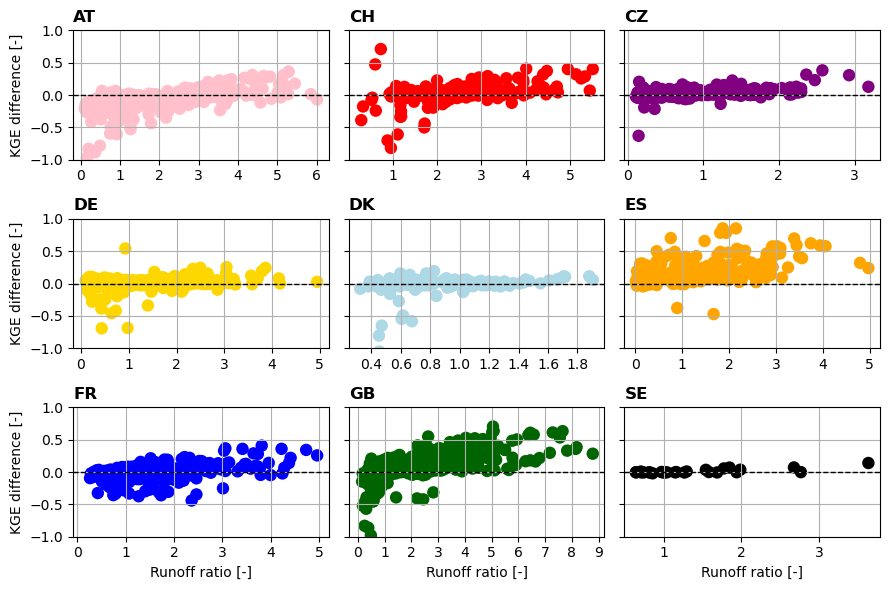

In [92]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Get unique color groups
groups = network_basins['color'].unique()
n_groups = len(groups)

# Map each color to its corresponding gauge_country (assuming it's consistent per color)
color_to_country = network_basins.drop_duplicates('color').set_index('color')['gauge_country'].to_dict()

# Set up subplot grid
n_cols = 3
n_rows = (n_groups + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9,6), sharex=False, sharey=True)
axes = axes.flatten()

for i, color in enumerate(groups):
    group_df = network_basins[network_basins['color'] == color]
    country = color_to_country[color]

    axes[i].scatter(
        group_df["q_mean"], 
        group_df["diff"], 
        color=color, 
        s=80, 
        alpha=1, 
        edgecolor='none'
    )
    axes[i].set_title(f"{country}", fontsize=12, fontweight="bold", loc="left")
    # Only set x-label for subplots in the bottom row
    if i // n_cols == n_rows - 1:
        axes[i].set_xlabel("Runoff ratio [-]")
    
    if i % n_cols == 0:
        axes[i].set_ylabel("KGE difference [-]")
    
    #axes[i].set_xlim(0, 2)
    axes[i].set_ylim(-1, 1)

    axes[i].grid(True)

    axes[i].xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    axes[i].axhline(0, color='black', linestyle='--', linewidth=1)

# Delete any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

#plt.savefig("results/figs/kge_scatters.png", dpi=300)

plt.show()

In [6]:
#network_estreams_filtered_quality_eobs = network_estreams_filtered_quality_eobs[network_estreams_filtered_quality_eobs.gauge_country == "CZ"]
#
#network_estreams_filtered_quality_eobs

In [7]:
#list_catchments1 = pd.read_csv('data/catchment_list.txt', encoding='utf-8', header=None)
#list_catchments2 = pd.read_csv('data/catchment_list_DK.txt', encoding='utf-8', header=None)
#
#list_catchments = pd.concat([list_catchments1, list_catchments2], ignore_index=True) 
#
#
#catchment_list = list_catchments.iloc[:, 0].tolist()  # Assuming there's only one column
#catchment_list

In [8]:
#catchment_list_CZ = network_estreams_filtered_quality_eobs.index.tolist()
#
#catchment_list = catchment_list + catchment_list_CZ
#
#catchment_list

In [10]:
#network_estreams_filtered = network_estreams.loc[catchment_list]
network_estreams_filtered = network_estreams_filtered_quality_eobs
network_estreams_filtered

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
FR004196,O419433002,Le Gijou Ã Vabre,FR,FR_EAUFRANCE,Le Gijou à Vabre,2.426336,43.694003,2.426336,43.694003,NaN,...,4063,1166.0,0.0,626.0,12019.0,C,['FR004195'],541,1,['FR004196']
DEBW0240,Hopfau Glatt,Hopfau Glatt,DE,DE_BW,NaN,8.578456,48.371265,8.578456,48.371265,430.15,...,15684,0.0,0.0,15684.0,0.0,B,NaN,1,1,['DEBW0240']
CZ000507,456510,Jedovnice-pila,CZ,CZ_CHMU,Jedovnický potok,16.739878,49.333322,16.739878,49.333322,NaN,...,11383,0.0,0.0,11383.0,0.0,B,NaN,2,2,"['CZ000506', 'CZ000507']"
CH000167,2488,Latterbach,CH,CH_CAMELS,Simme,7.580000,46.660000,7.580000,46.660000,667,...,13363,0.0,0.0,13363.0,0.0,B,NaN,1,3,"['CH000049', 'CH000073', 'CH000167']"
FR002102,R233505001,R2335050,FR,FR_EAUFRANCE,La Touvre [résurgence] à Gond-Pontouvre [Foulp...,0.168410,45.673266,0.168410,45.673266,31,...,7413,401.0,12731.0,0.0,2847.0,C,NaN,742,5,"['FR002099', 'FR002100', 'FR002101', 'FR002102..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ES001046,8148,JERICA,ES,ES_CEDEX,NaN,-0.545349,39.894130,-0.545349,39.894130,410,...,4748,0.0,0.0,4748.0,0.0,B,NaN,582,1,['ES001046']
DK000407,51000041,NV FOR STRANDGÅRD,DK,DK_ODA,TRUELSBÆK,11.768011,55.653172,11.768011,55.653172,NaN,...,365,0.0,365.0,0.0,0.0,A,NaN,317,1,['DK000407']
GB000521,63001,Ystwyth at Pont Llolwyn,GB,GB_NRFA,Ystwyth at Pont Llolwyn,-4.070000,52.380000,-4.070000,52.380000,12,...,9568,32.0,0.0,21153.0,0.0,B,NaN,1117,2,"['GB000522', 'GB000521']"


In [11]:
network_estreams_filtered.groupby('gauge_country').size()

gauge_country
AT     534
CH     225
CZ     477
DE    1724
DK     546
ES     950
FR    3031
GB     646
IS      69
SE     165
dtype: int64

In [12]:
import tqdm as tqdm 

In [13]:
import pandas as pd
import os
import shutil
import zipfile

In [14]:
# Dictionary to store NaN counts per basin_id
nan_counts_dict = {}

for basin_id in tqdm.tqdm(network_estreams_filtered.index):
    data = pd.read_csv(path_estreams+"\\data\estreams_timeseries_"+basin_id+".csv", index_col=0)

    #data["q_mean"] = timeseries_estreams[basin_id]
    #data.to_csv(r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Data\data"+"\estreams_timeseries_"+basin_id+".csv")

    output_folder = f"results\hbv\{basin_id}"  # Folder named after the basin_id
    txt_filename = os.path.join(output_folder, "ptq_estreams.txt")
    txt_filename_evap = os.path.join(output_folder, "evap_estreams.txt")

    zip_filename = f"results\hbv\{basin_id}.zip"

    # Create the output folder
    os.makedirs(output_folder, exist_ok=True)

    # Ensure the required columns exist
    required_columns = ["p_mean", "t_mean", "q_mean"]
    df_selected = data[required_columns].copy()

    df_selected.index = pd.to_datetime(df_selected.index)

    df_selected = df_selected.loc["01-10-1990":"30-09-2015"]

    # Format the date index to YYYYMMDD
    df_selected.insert(0, "date", df_selected.index.strftime("%Y%m%d"))

    df_selected.columns = ["Date", "P", "T", "Q"]

    df_pet = data["pet_mean"].copy()

    # Count NaN values in P and T
    nan_counts_dict[basin_id] = {
        "P": df_selected["P"].isna().sum(),
        "T": df_selected["T"].isna().sum(),
        "evap": df_pet.isna().sum(),
        "Q": df_selected["Q"].isna().sum()
        }
    
    # Interpolate when needed:
    #df_selected['P'] = df_selected['P'].interpolate()
    #df_selected['T'] = df_selected['T'].interpolate()
    #df_selected["Q"].fillna(-9999, inplace=True)
    #df_pet = df_pet.interpolate()

    ## Save the formatted data to ptq_estreams.txt (tab-separated, no header)
    #df_selected.to_csv(txt_filename, sep="\t", header=True, index=False)


    #df_pet.index = pd.to_datetime(df_pet.index)
    #df_pet = df_pet.loc["01-10-1990":"30-09-2015"]
    ## Convert Series to DataFrame and rename column
    #df_pet = df_pet.to_frame(name=f"basin.{basin_id}")    
    #
    #df_pet.to_csv(txt_filename_evap, sep="\t", header=True, index=False)

    ## Create a zip archive of the folder
    #with zipfile.ZipFile(zip_filename, "w", zipfile.ZIP_DEFLATED) as zipf:
    #    for root, _, files in os.walk(output_folder):
    #        for file in files:
    #            file_path = os.path.join(root, file)
    #            zipf.write(file_path, os.path.relpath(file_path, output_folder))

    ## Remove the uncompressed folder after zipping (optional)
    #shutil.rmtree(output_folder)

# Convert dictionary to DataFrame
nan_counts_df = pd.DataFrame.from_dict(nan_counts_dict, orient="index").reset_index()
nan_counts_df.rename(columns={"index": "basin_id"}, inplace=True)

nan_counts_df.to_csv(r"results\nan_counts_df.csv")

100%|██████████| 8367/8367 [22:16<00:00,  6.26it/s]


In [15]:
nan_counts_df

,basin_id,P,T,evap,Q
0,FR004196,0,0,0,574
1,DEBW0240,0,0,0,0
2,CZ000507,0,0,0,1369
3,CH000167,0,0,0,0
4,FR002102,0,0,0,220
...,...,...,...,...,...
8362,ES001046,0,0,0,6108
8363,DK000407,0,0,4,9395
8364,GB000521,0,0,1,11
8365,FR002673,0,0,0,9395


In [16]:
nan_counts_df.set_index("basin_id", inplace=True)

In [ ]:
from datetime import datetime

start = datetime.strptime("01.10.1990", "%d.%m.%Y")
end = datetime.strptime("30.09.2015", "%d.%m.%Y")

num_days = (end - start).days + 1  # +1 to include both start and end dates
print(f"Number of days: {num_days}")

Number of days: 9131


In [21]:
nan_counts_df[["P_perc", "T_perc", "evap_perc"]] = 100*(nan_counts_df[["P", "T", "evap"]]/9131)

In [38]:
nan_counts_df[nan_counts_df["T"] > 0]

,P,T,evap,Q,P_perc,T_perc,evap_perc
basin_id,,,,,,,
GB000671,0,1,42,0,0.0,0.010952,0.459972
GB000003,0,1,43,2129,0.0,0.010952,0.470923
GB000668,0,1,145,0,0.0,0.010952,1.587997


In [37]:
nan_counts_df[nan_counts_df["P"] > 0]

,P,T,evap,Q,P_perc,T_perc,evap_perc
basin_id,,,,,,,


In [41]:
nan_counts_df[nan_counts_df["evap"] > 913]

,P,T,evap,Q,P_perc,T_perc,evap_perc
basin_id,,,,,,,
IS000078,0,0,1890,364,0.0,0.0,20.698719
IS000018,0,0,1680,2923,0.0,0.0,18.398861
IS000025,0,0,1682,3154,0.0,0.0,18.420764
IS000108,0,0,1681,2173,0.0,0.0,18.409813
SE000201,0,0,3779,1283,0.0,0.0,41.386486
...,...,...,...,...,...,...,...
SE000068,0,0,3766,1459,0.0,0.0,41.244113
IS000071,0,0,1781,5945,0.0,0.0,19.504983
IS000097,0,0,1689,2521,0.0,0.0,18.497426


In [45]:
basins_gaps_many_evap = nan_counts_df[nan_counts_df["evap"] > 913].index.tolist()

<Axes: >

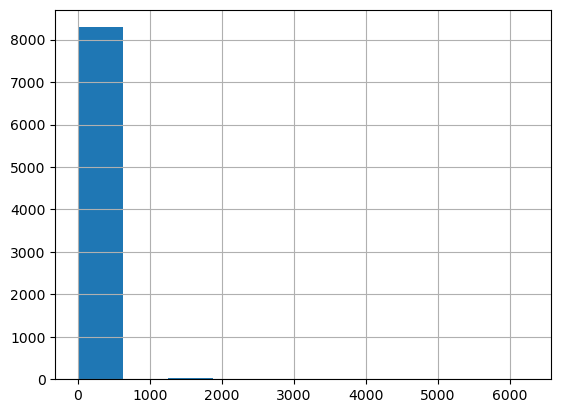

In [42]:
nan_counts_df["evap"].hist()

In [35]:
nan_counts_df[nan_counts_df["T"] > 913]

,P,T,evap,Q,P_perc,T_perc,evap_perc
basin_id,,,,,,,


In [56]:
nan_counts_df[nan_counts_df.evap > 11].tail(10)

,basin_id,P,T,evap,Q
2796,GB000668,0,1,145,0
2797,GB000669,0,0,58,0
2798,GB000671,0,1,42,0
2799,IS000003,0,0,2221,634
2800,IS000013,0,0,1680,374
2801,IS000077,0,0,1766,588
2802,IS000093,0,0,1903,603
2804,SE000005,0,0,12,0
2813,SE000025,0,0,1250,0
2822,SE000066,0,0,6264,0


<Axes: xlabel='basin_id'>

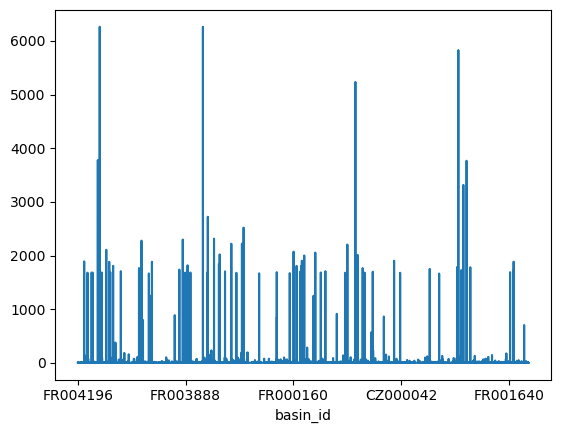

In [43]:
nan_counts_df["evap"].plot()

In [46]:
network_estreams_filtered_quality_eobs = network_estreams_filtered_quality_eobs.loc[
    ~network_estreams_filtered_quality_eobs.index.isin(basins_gaps_many_evap)
]
network_estreams_filtered_quality_eobs

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,elevation,...,num_continuous_days,num_days_gaps,num_days_reliable,num_days_noflag,num_days_suspect,gauge_flag,duplicated_suspect,watershed_group,gauges_upstream,nested_catchments
basin_id,,,,,,,,,,,,,,,,,,,,,
FR004196,O419433002,Le Gijou Ã Vabre,FR,FR_EAUFRANCE,Le Gijou à Vabre,2.426336,43.694003,2.426336,43.694003,NaN,...,4063,1166.0,0.0,626.0,12019.0,C,['FR004195'],541,1,['FR004196']
DEBW0240,Hopfau Glatt,Hopfau Glatt,DE,DE_BW,NaN,8.578456,48.371265,8.578456,48.371265,430.15,...,15684,0.0,0.0,15684.0,0.0,B,NaN,1,1,['DEBW0240']
CZ000507,456510,Jedovnice-pila,CZ,CZ_CHMU,Jedovnický potok,16.739878,49.333322,16.739878,49.333322,NaN,...,11383,0.0,0.0,11383.0,0.0,B,NaN,2,2,"['CZ000506', 'CZ000507']"
CH000167,2488,Latterbach,CH,CH_CAMELS,Simme,7.580000,46.660000,7.580000,46.660000,667,...,13363,0.0,0.0,13363.0,0.0,B,NaN,1,3,"['CH000049', 'CH000073', 'CH000167']"
FR002102,R233505001,R2335050,FR,FR_EAUFRANCE,La Touvre [résurgence] à Gond-Pontouvre [Foulp...,0.168410,45.673266,0.168410,45.673266,31,...,7413,401.0,12731.0,0.0,2847.0,C,NaN,742,5,"['FR002099', 'FR002100', 'FR002101', 'FR002102..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ES001046,8148,JERICA,ES,ES_CEDEX,NaN,-0.545349,39.894130,-0.545349,39.894130,410,...,4748,0.0,0.0,4748.0,0.0,B,NaN,582,1,['ES001046']
DK000407,51000041,NV FOR STRANDGÅRD,DK,DK_ODA,TRUELSBÆK,11.768011,55.653172,11.768011,55.653172,NaN,...,365,0.0,365.0,0.0,0.0,A,NaN,317,1,['DK000407']
GB000521,63001,Ystwyth at Pont Llolwyn,GB,GB_NRFA,Ystwyth at Pont Llolwyn,-4.070000,52.380000,-4.070000,52.380000,12,...,9568,32.0,0.0,21153.0,0.0,B,NaN,1117,2,"['GB000522', 'GB000521']"


In [ ]:
network_estreams_filtered_quality_eobs.groupby('gauge_country').size()

gauge_country
AT     534
CH     225
CZ     477
DE    1724
DK     546
ES     950
FR    3031
GB     646
IS      69
SE     165
dtype: int64

In [ ]:
network_estreams_filtered_quality_eobs.to_csv("results/network_estreams_filtered_quality_eobs_8297.csv", encoding='utf-8')

# End